In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("C:/Users/Tony Tomy/Downloads/archive/hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.shape

(119390, 32)

In [4]:
df.drop(inplace=True, axis=1, labels=['agent', 'company','hotel','reservation_status_date'])

In [5]:
cols = df.columns
df.isnull().sum()

is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_spe

In [6]:
df.fillna(df.mode().iloc[0], inplace=True)

In [7]:
df.isnull().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

# EDA

C:\Users\Tony Tomy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Tony Tomy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Tony Tomy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Tony Tomy\

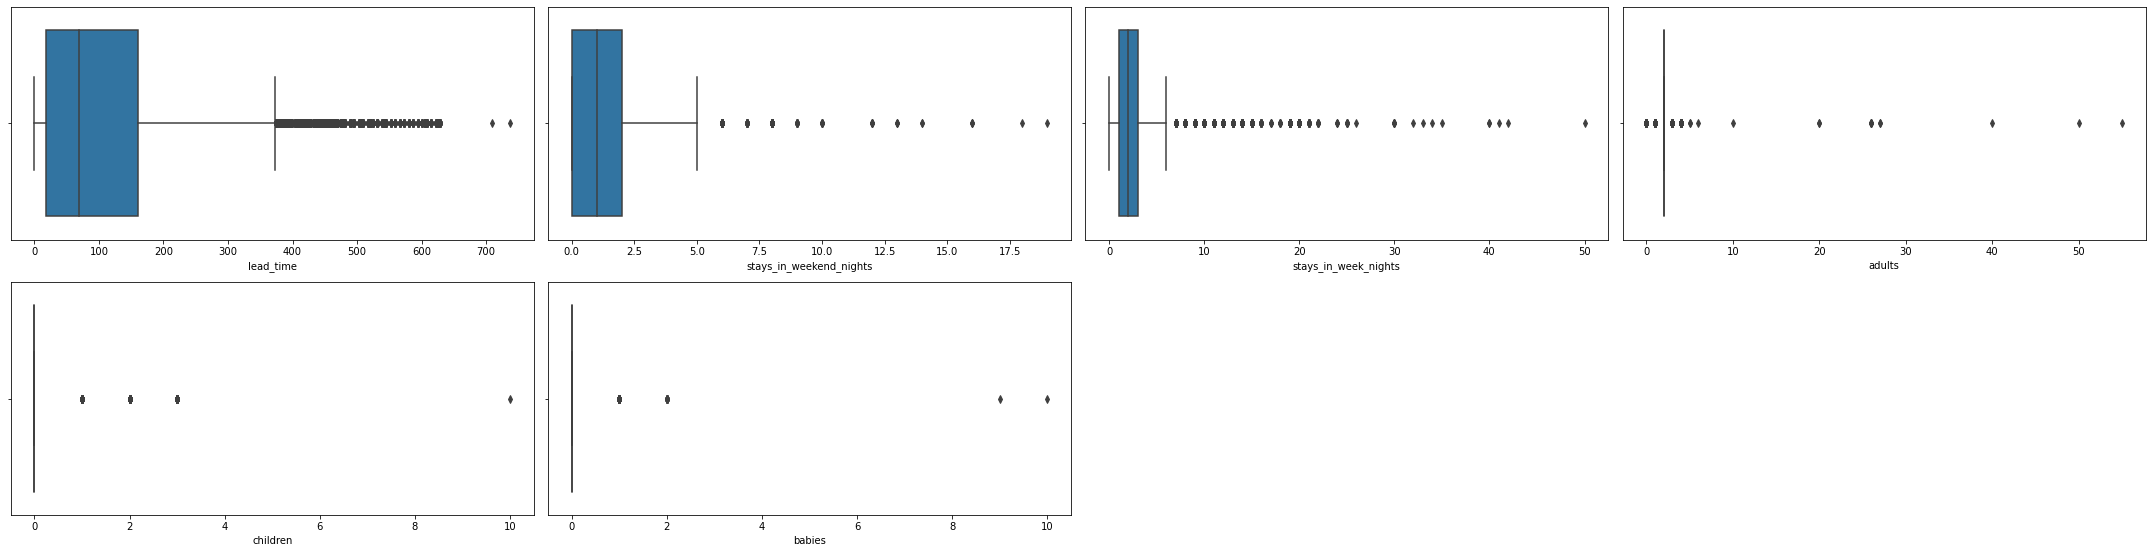

In [8]:
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults','children', 'babies' ]
n = 1
plt.figure(figsize=(30,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()

C:\Users\Tony Tomy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


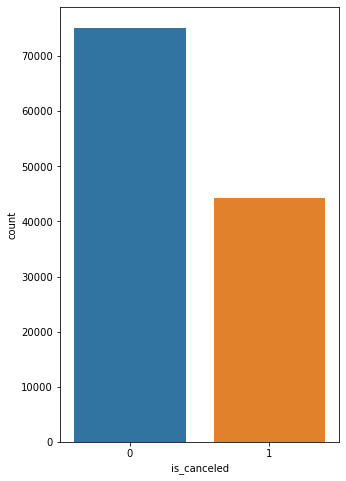

In [9]:
#0 no 1 yes then 0 is more than 1 ,persons who canccelled after booking is less than persons who does not cancel
plt.figure(figsize=(5,8))


sns.countplot(df['is_canceled'])
plt.show()

C:\Users\Tony Tomy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


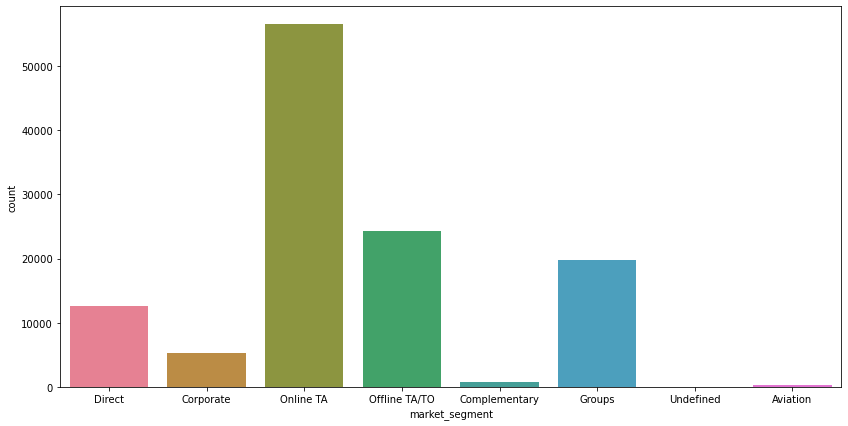

In [10]:
plt.figure(figsize=(14,7))
sns.countplot(df['market_segment'], palette='husl')
plt.show()

# Logistic Regression

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [12]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [13]:
ct = make_column_transformer(
    (OneHotEncoder(),['meal','distribution_channel','reservation_status','country','arrival_date_month','market_segment','deposit_type','customer_type', 'reserved_room_type','assigned_room_type' ]), remainder = 'passthrough'
    )

In [14]:
X = ct.fit_transform(X).toarray()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
classifier = LogisticRegression(random_state = 0, max_iter=10000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [18]:
predictions = classifier.predict(X_test)

# Precision Recall and F1-Score

In [19]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14934
           1       1.00      1.00      1.00      8944

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



# Confusion Matrix

In [23]:
from sklearn import metrics

In [24]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[14934     0]
 [    0  8944]]


<AxesSubplot:>

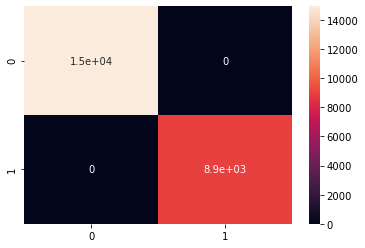

In [25]:
sns.heatmap(cm, annot=True)

# Sensitivity and Specificity

In [26]:
total = sum(sum(cm))
Accuracy = (cm[0,0]+cm[1,1])/total
Specificity = cm[0,0]/(cm[0,0]+cm[0,1])
Sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])

In [27]:
print("Accuracy : ", Accuracy,"\nSpecificity : ", Specificity, "\nSensitivity : ", Sensitivity)

Accuracy :  1.0 
Specificity :  1.0 
Sensitivity :  1.0


# Misclassification Rate

In [28]:
mr = (cm[0,1]+cm[1,0])/total
print("Misclassification Rate : ", mr)

Misclassification Rate :  0.0


# ROC Curve

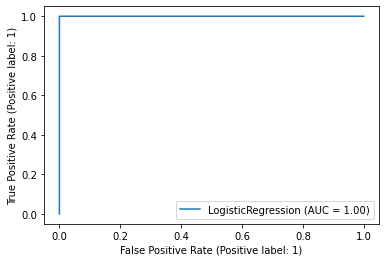

In [31]:
metrics.plot_roc_curve(classifier, X_test, y_test)

# AUROC

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predictions, average=None)

1.0